<a href="https://colab.research.google.com/github/Cristian1308/Project-Machine-Learning/blob/main/Analisis_exploratorio_con_Feature_importance_en_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se importan las librerías para manejo de datos, modelo de clasificación y visualización.

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

Se carga el dataset desde Google Drive.

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Exploratorio/card_transdata.csv')

Se separan las variables predictoras (X) y la variable objetivo (y), que indica si una transacción es fraudulenta.

In [3]:
X = df.drop('fraud', axis=1)
y = df['fraud']

Se crea y entrena un modelo Random Forest con 100 árboles para clasificar fraudes.

In [4]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

Se extraen las importancias de cada variable en el modelo y sus nombres.

In [5]:
importances = rf.feature_importances_
feature_names = X.columns

Se organiza la información en un DataFrame y se ordena de mayor a menor importancia.

In [6]:
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


Se crea un gráfico de barras horizontales que muestra qué variables fueron más relevantes para el modelo.

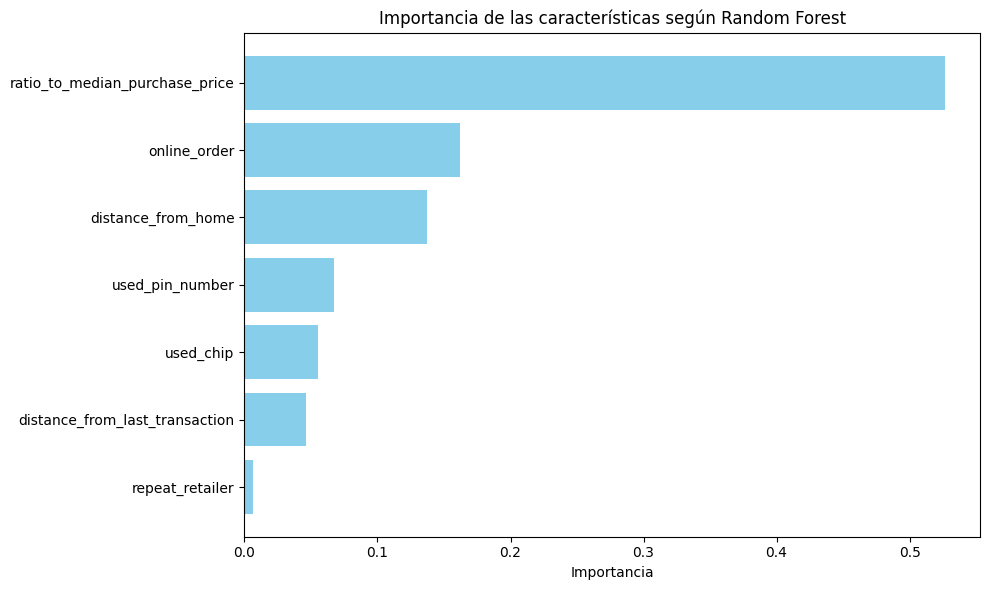

In [7]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las características según Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()